## Import Libraries

We will import pandas to read our data from a CSV file and manipulate it for further use. We will also use numpy to convert 
out data into a format suitable to feed our classification model. We'll use seaborn and matplotlib for visualizations.

In [26]:
#import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Import Data

We have our data saved in a CSV file called train_new.csv which we will use to train our model and data which is present in test.csv, we will have to predict outcomes for it. We first read our dataset in a pandas dataframe called insuranceDF, and then use the head() function to show the first five records from our dataset.

In [27]:
#Import data
train_data=pd.read_csv('train_new.csv', index_col='RowNumber')
test_data=pd.read_csv('test_new.csv',index_col='RowNumber')

In [28]:
train_data.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,15634602,Hargrave,619.0,France,Female,45.0,2,0.00,1,1,101348.88,1
2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,0,1,112542.58,0
3,15619304,Onio,502.0,France,Female,42.0,8,159660.80,1,0,113931.57,1
4,15701354,Boni,699.0,France,Female,39.0,1,0.00,0,0,93826.63,0
5,15737888,Mitchell,1100.0,Spain,Female,43.0,2,125510.82,1,1,79084.10,0


In [29]:
test_data.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,,
5001,15598695,Fields,834,Germany,Female,68,9,130169.27,0,1,93112.20
5002,15649354,Johnston,754,Spain,Male,35,4,0.00,1,1,9658.41
5003,15737556,Vasilyev,590,France,Male,43,7,81076.80,1,1,182627.25
5004,15671610,Hooper,740,France,Male,36,7,0.00,1,1,13177.40
5005,15625092,Colombo,502,Germany,Female,57,3,101465.31,1,0,43568.31


## Manupulation

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 12 columns):
CustomerId         5000 non-null int64
Surname            5000 non-null object
CreditScore        4993 non-null float64
Geography          5000 non-null object
Gender             5000 non-null object
Age                4985 non-null float64
Tenure             5000 non-null int64
Balance            5000 non-null float64
HasCrCard          5000 non-null int64
IsActiveMember     5000 non-null int64
EstimatedSalary    5000 non-null float64
Exited             5000 non-null int64
dtypes: float64(4), int64(5), object(3)
memory usage: 507.8+ KB


In [31]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 5001 to 10000
Data columns (total 11 columns):
CustomerId         5000 non-null int64
Surname            5000 non-null object
CreditScore        5000 non-null int64
Geography          5000 non-null object
Gender             5000 non-null object
Age                5000 non-null int64
Tenure             5000 non-null int64
Balance            5000 non-null float64
HasCrCard          5000 non-null int64
IsActiveMember     5000 non-null int64
EstimatedSalary    5000 non-null float64
dtypes: float64(2), int64(6), object(3)
memory usage: 468.8+ KB


In [32]:
train_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,5.000000e+03,4993.000000,4985.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,1.569033e+07,650.387943,38.993781,5.009200,77051.932626,0.708600,0.51000,100343.748618,0.209200
std,7.158643e+04,97.818171,10.609730,2.879579,62417.714791,0.454453,0.49995,57708.381821,0.406778
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,0.000000,0.00000,11.580000,0.000000
25%,1.562816e+07,582.000000,32.000000,3.000000,0.000000,0.000000,0.00000,50870.902500,0.000000
50%,1.569001e+07,652.000000,37.000000,5.000000,97466.985000,1.000000,1.00000,100579.380000,0.000000
75%,1.575235e+07,717.000000,44.000000,7.000000,128032.042500,1.000000,1.00000,149107.817500,0.000000
max,1.581566e+07,1100.000000,88.000000,10.000000,250898.090000,1.000000,1.00000,199970.740000,1.000000


In [33]:
test_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.569155e+07,650.812200,38.855000,5.016400,75919.845950,0.702400,0.520200,99836.731144
std,7.228632e+04,95.778196,10.376739,2.904999,62378.194403,0.457248,0.499642,57316.570906
min,1.556571e+07,350.000000,18.000000,0.000000,0.000000,0.000000,0.000000,90.070000
25%,1.562898e+07,585.000000,32.000000,2.000000,0.000000,0.000000,0.000000,51358.462500
50%,1.569151e+07,651.000000,37.000000,5.000000,96778.940000,1.000000,1.000000,99875.635000
75%,1.575408e+07,718.000000,44.000000,7.250000,127298.047500,1.000000,1.000000,149511.647500
max,1.581569e+07,850.000000,92.000000,10.000000,222267.630000,1.000000,1.000000,199992.480000


In [34]:
#Create a column in test data so that we can merge this with train data and later we can saperate it.
test_data['Exited']=-999

In [35]:
test_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
5001,15598695,Fields,834,Germany,Female,68,9,130169.27,0,1,93112.20,-999
5002,15649354,Johnston,754,Spain,Male,35,4,0.00,1,1,9658.41,-999
5003,15737556,Vasilyev,590,France,Male,43,7,81076.80,1,1,182627.25,-999
5004,15671610,Hooper,740,France,Male,36,7,0.00,1,1,13177.40,-999
5005,15625092,Colombo,502,Germany,Female,57,3,101465.31,1,0,43568.31,-999


In [36]:
#concatenate train and test data to perform operation on both
total_data=pd.concat((train_data,test_data),axis=0)

In [37]:
#Check details about all features of the data    #till this done
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 12 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        9993 non-null float64
Geography          10000 non-null object
Gender             10000 non-null object
Age                9985 non-null float64
Tenure             10000 non-null int64
Balance            10000 non-null float64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(4), int64(5), object(3)
memory usage: 1015.6+ KB


In [38]:
#Check mathematical operations in one go..
total_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,9993.000000,9985.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.600220,38.924286,5.012800,76485.889288,0.70550,0.515100,100090.239881,-499.395400
std,7.193619e+04,96.798231,10.493410,2.892174,62397.405202,0.45584,0.499797,57510.492818,499.629665
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,0.00000,0.000000,11.580000,-999.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,0.00000,0.000000,51002.110000,-999.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.00000,1.000000,100193.915000,-499.500000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,1100.000000,92.000000,10.000000,250898.090000,1.00000,1.000000,199992.480000,1.000000


In [39]:
#Top 5 records of the data
total_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,15634602,Hargrave,619.0,France,Female,45.0,2,0.00,1,1,101348.88,1
2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,0,1,112542.58,0
3,15619304,Onio,502.0,France,Female,42.0,8,159660.80,1,0,113931.57,1
4,15701354,Boni,699.0,France,Female,39.0,1,0.00,0,0,93826.63,0
5,15737888,Mitchell,1100.0,Spain,Female,43.0,2,125510.82,1,1,79084.10,0


In [40]:
#Last 5 records of the data
total_data.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
9996,15606229,Obijiaku,771.0,France,Male,39.0,5,0.00,1,0,96270.64,-999
9997,15569892,Johnstone,516.0,France,Male,35.0,10,57369.61,1,1,101699.77,-999
9998,15584532,Liu,709.0,France,Female,36.0,7,0.00,0,1,42085.58,-999
9999,15682355,Sabbatini,772.0,Germany,Male,42.0,3,75075.31,1,0,92888.52,-999
10000,15628319,Walker,792.0,France,Female,28.0,4,130142.79,1,0,38190.78,-999


In [41]:
#Check individual column of the dataset
total_data['CreditScore'].head()

RowNumber
1     619.0
2     608.0
3     502.0
4     699.0
5    1100.0
Name: CreditScore, dtype: float64

In [42]:
#selecting multiple columns of the dataset
total_data[['Surname','Tenure']].head()

,Surname,Tenure
RowNumber,,
1,Hargrave,2
2,Hill,1
3,Onio,8
4,Boni,1
5,Mitchell,2


In [43]:
#using index
#before , is row and after  , is column
total_data.loc[1:10,]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,15634602,Hargrave,619.0,France,Female,45.0,2,0.00,1,1,101348.88,1
2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,0,1,112542.58,0
3,15619304,Onio,502.0,France,Female,42.0,8,159660.80,1,0,113931.57,1
4,15701354,Boni,699.0,France,Female,39.0,1,0.00,0,0,93826.63,0
5,15737888,Mitchell,1100.0,Spain,Female,43.0,2,125510.82,1,1,79084.10,0
6,15574012,Chu,645.0,Spain,Male,44.0,8,113755.78,1,0,149756.71,1
7,15592531,Bartlett,822.0,France,Male,50.0,7,0.00,1,1,10062.80,0
8,15656148,Obinna,376.0,Germany,Female,29.0,4,115046.74,1,0,119346.88,1
9,15792365,He,501.0,France,Male,44.0,4,142051.07,0,1,74940.50,0


In [44]:
#to get value till certain column
total_data.loc[5:10,'Age':'IsActiveMember']

,Age,Tenure,Balance,HasCrCard,IsActiveMember
RowNumber,,,,,
5,43.0,2,125510.82,1,1
6,44.0,8,113755.78,1,0
7,50.0,7,0.00,1,1
8,29.0,4,115046.74,1,0
9,44.0,4,142051.07,0,1
10,27.0,2,134603.88,1,1


In [45]:
#To get data of specific column
total_data.loc[5:10,['Age','Surname','CustomerId']]

,Age,Surname,CustomerId
RowNumber,,,
5,43.0,Mitchell,15737888
6,44.0,Chu,15574012
7,50.0,Bartlett,15592531
8,29.0,Obinna,15656148
9,44.0,He,15792365
10,27.0,H?,15592389


In [46]:
#position based indexing
total_data.iloc[1:8,-3:-1]  #index start from 0

,IsActiveMember,EstimatedSalary
RowNumber,,
2,1,112542.58
3,0,113931.57
4,0,93826.63
5,1,79084.10
6,0,149756.71
7,1,10062.80
8,0,119346.88


## Numerical Feature

In [47]:
#centrality measures
print('Mean is : {}'.format(total_data.Balance.mean()))
print('Mean is : {}'.format(total_data.CreditScore.median()))
print('Mean and median is : {0}, {1}'.format(total_data.CreditScore.median(), total_data.CreditScore.mean()))

Mean is : 76485.889288
Mean is : 652.0
Mean and median is : 652.0, 650.6002201541079


In [48]:
#for ploting graph
%matplotlib inline

In [49]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [50]:
%time a=range(1000)

Wall time: 0 ns


In [51]:
%timeit a=range(1000)
x=max(a)

236 ns ± 14.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


                 CustomerId  CreditScore       Age    Tenure   Balance  \
CustomerId         1.000000     0.005916  0.009504 -0.014883 -0.012419   
CreditScore        0.005916     1.000000 -0.003587  0.001349  0.006565   
Age                0.009504    -0.003587  1.000000 -0.009852  0.028260   
Tenure            -0.014883     0.001349 -0.009852  1.000000 -0.012254   
Balance           -0.012419     0.006565  0.028260 -0.012254  1.000000   
HasCrCard         -0.014025    -0.005416 -0.011759  0.022583 -0.014858   
IsActiveMember     0.001665     0.025579  0.085793 -0.028362 -0.010084   
EstimatedSalary    0.015271    -0.001332 -0.007277  0.007784  0.012797   
Exited            -0.008430    -0.002201  0.006731 -0.001250  0.009112   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  
CustomerId       -0.014025        0.001665         0.015271 -0.008430  
CreditScore      -0.005416        0.025579        -0.001332 -0.002201  
Age              -0.011759        0.085793 

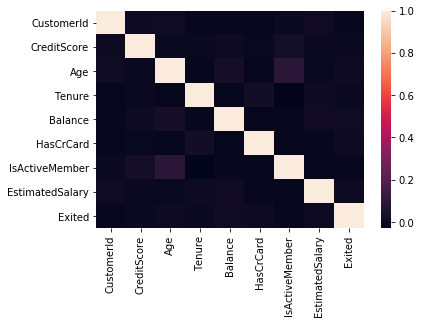

In [52]:
#finding corelation in our data
corr = total_data.corr()
print(corr)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

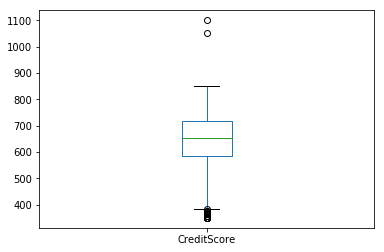

In [53]:
#Box plot#Box plot 
total_data.CreditScore.plot('box')

## categorical feature

In [54]:
# to get description of categorical features include all in parameter
total_data.describe(include='all')

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000,9993.000000,10000,10000,9985.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,NaN,650.600220,NaN,NaN,38.924286,5.012800,76485.889288,0.70550,0.515100,100090.239881,-499.395400
std,7.193619e+04,NaN,96.798231,NaN,NaN,10.493410,2.892174,62397.405202,0.45584,0.499797,57510.492818,499.629665
min,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,0.00000,0.000000,11.580000,-999.000000
25%,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,0.00000,0.000000,51002.110000,-999.000000
50%,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.00000,1.000000,100193.915000,-499.500000
75%,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,1.00000,1.000000,149388.247500,0.000000


In [55]:
#To get value count of customer who exited and not
total_data[total_data.Exited!=-999].Exited.value_counts()

0    3954
1    1046
Name: Exited, dtype: int64

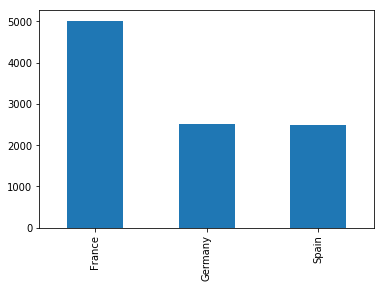

In [56]:
#visualise counts
total_data.Geography.value_counts().plot(kind='bar')

## Ditributions

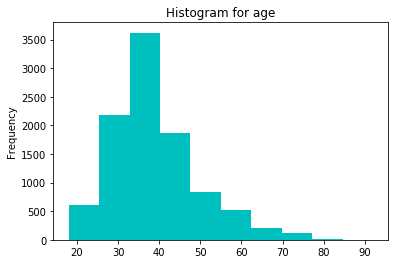

In [57]:
#use hist to create histogram
total_data.Age.plot(kind='hist',title='Histogram for age',color='c')

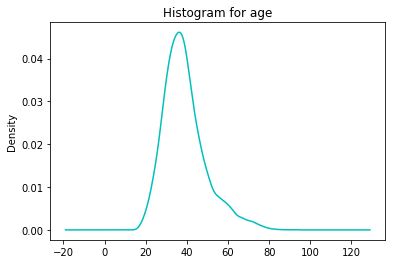

In [58]:
#use kde plot
total_data.Age.plot(kind='kde',title='Histogram for age',color='c')

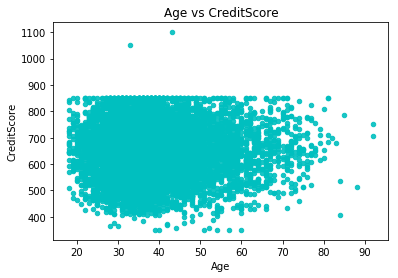

In [59]:
#use hist to create histogram
total_data.plot.scatter(x='Age',y='CreditScore',color='c',title='Age vs CreditScore',alpha=0.9)

## Grouping

In [60]:
#group by#group by
total_data.groupby('Gender').Age.median()

Gender
Female    38.0
Male      37.0
Name: Age, dtype: float64

In [61]:
total_data.groupby(['Gender'])['EstimatedSalary','Age'].median()

,EstimatedSalary,Age
Gender,,
Female,101905.34,38.0
Male,98060.51,37.0


In [62]:
total_data.groupby(['Gender']).agg({'EstimatedSalary':'mean','Age':'median'})

,EstimatedSalary,Age
Gender,,
Female,100601.541382,38.0
Male,99664.576931,37.0


## Remove the columns which is of no use

In [63]:
#drop the columns which is of no use
total_data.drop(['CustomerId','Surname'],axis=1,inplace=True)
total_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,
1,619.0,France,Female,45.0,2,0.00,1,1,101348.88,1
2,608.0,Spain,Female,41.0,1,83807.86,0,1,112542.58,0
3,502.0,France,Female,42.0,8,159660.80,1,0,113931.57,1
4,699.0,France,Female,39.0,1,0.00,0,0,93826.63,0
5,1100.0,Spain,Female,43.0,2,125510.82,1,1,79084.10,0


## Working with missing values

In [64]:
#check for missing values
#train_data_processed.loc[train_data.Age.isnull()]
total_data.loc[total_data.CreditScore.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,
58,NaN,Germany,Male,19.0,0,75888.20,0,0,45613.75,0
60,NaN,France,Male,51.0,4,40685.92,1,1,46775.28,0
62,NaN,Germany,Female,27.0,9,152328.88,0,0,126494.82,0
80,NaN,Germany,Female,NaN,10,122189.66,1,0,98301.61,0
81,NaN,France,Female,34.0,1,96645.54,0,0,171413.66,0
95,NaN,Spain,Male,42.0,4,0.00,0,1,85982.47,0
96,NaN,Spain,Male,35.0,10,176273.95,0,1,121277.78,0


In [65]:
total_data.CreditScore.mean()

650.6002201541079

In [66]:
total_data[total_data.Gender=='Male'].CreditScore.mean()

650.2800293416468

In [67]:
total_data.CreditScore.fillna(650,inplace=True)

In [68]:
total_data.loc[total_data.Age.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,
48,637.0,Germany,Female,NaN,9,137843.80,1,1,117622.80,1
52,585.0,Germany,Male,NaN,5,146050.97,0,0,86424.57,0
75,519.0,France,Male,NaN,9,0.00,0,1,145562.40,0
80,650.0,Germany,Female,NaN,10,122189.66,1,0,98301.61,0
97,773.0,Spain,Male,NaN,9,102827.44,0,1,64595.25,0
108,785.0,Germany,Female,NaN,2,99806.85,0,1,36976.52,0
126,432.0,France,Male,NaN,9,152603.45,1,0,110265.24,1
132,795.0,Germany,Female,NaN,9,130862.43,1,1,114935.21,0
3867,547.0,France,Female,NaN,6,104450.86,1,1,37160.28,0


In [69]:
total_data.Age.mean()

38.92428642964447

In [70]:
total_data.Age.fillna(39,inplace=True)

In [71]:
#check if there is any null value rows left
total_data.loc[total_data.Age.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,


## Working with outliers

In [72]:
#check outliers in creditscore
total_data.loc[total_data.CreditScore >1000]

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,
5,1100.0,Spain,Female,43.0,2,125510.82,1,1,79084.10,0
53,1050.0,France,Female,33.0,5,0.00,0,0,116978.19,0


In [73]:
#Mean value of gender=female to replace the outliers
total_data[total_data.Gender=='Female'].CreditScore.mean()

650.9841514417785

In [74]:
#Replacing outliers
total_data['CreditScore'].replace([1100,1050], 651,inplace=True)  ####done till here

## Save train and test data

In [75]:
#train data#train da 
total_data.loc[total_data.Exited!=-999].to_csv('train_processed')
#test data
columns=[column for column in total_data.columns if column!='Exited']
total_data.loc[total_data.Exited==-999,columns].to_csv('test_processed')

## Import Processed data

In [76]:
#Import processed data
train_data_processed=pd.read_csv('train_processed.csv', index_col='RowNumber')

#importing processed test data, it will be used at last to predict outcome
#test_data_processed=pd.read_csv('test_processed.csv',index_col='RowNumber')

## Seprating dependent and independent variable

In [80]:
#5 records of train file
train_data_processed.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,
1,619,France,Female,45,2,0.00,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,1,0,113931.57,1
4,699,France,Female,39,1,0.00,0,0,93826.63,0
5,651,Spain,Female,43,2,125510.82,1,1,79084.10,0
6,645,Spain,Male,44,8,113755.78,1,0,149756.71,1
7,822,France,Male,50,7,0.00,1,1,10062.80,0
8,376,Germany,Female,29,4,115046.74,1,0,119346.88,1
9,501,France,Male,44,4,142051.07,0,1,74940.50,0


In [78]:
#seprating independent features and dependent features of train data
X=train_data_processed.iloc[:,:9].values
y=train_data_processed.iloc[:,9].values

In [79]:
#checking dependent/label/(exited) value
y

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

## Encoding Categorical Variables

In [81]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencode_X1=LabelEncoder()
X[:,1]=labelencode_X1.fit_transform(X[:,1])
labelencode_X2=LabelEncoder()
X[:,2]=labelencode_X2.fit_transform(X[:,2])

In [82]:
#converting array to dataframe to check if label encoder has worked or not
test_df1=pd.DataFrame(data=X[:,:])
test_df1.head(10)

,0,1,2,3,4,5,6,7,8
0,619,0,0,45,2,0,1,1,101349
1,608,2,0,41,1,83807.9,0,1,112543
2,502,0,0,42,8,159661,1,0,113932
3,699,0,0,39,1,0,0,0,93826.6
4,651,2,0,43,2,125511,1,1,79084.1
5,645,2,1,44,8,113756,1,0,149757
6,822,0,1,50,7,0,1,1,10062.8
7,376,1,0,29,4,115047,1,0,119347
8,501,0,1,44,4,142051,0,1,74940.5
9,684,0,1,27,2,134604,1,1,71725.7


In [83]:
#5 records of original file to compare the columns
total_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,
1,619.0,France,Female,45.0,2,0.00,1,1,101348.88,1
2,608.0,Spain,Female,41.0,1,83807.86,0,1,112542.58,0
3,502.0,France,Female,42.0,8,159660.80,1,0,113931.57,1
4,699.0,France,Female,39.0,1,0.00,0,0,93826.63,0
5,651.0,Spain,Female,43.0,2,125510.82,1,1,79084.10,0


In [84]:
#one hot encoding of geography column
onehotencode=OneHotEncoder(categorical_features=[1])
X=onehotencode.fit_transform(X).toarray()

c:\users\671869\documents\traning_season2\training\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\671869\documents\traning_season2\training\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [85]:
#check the dimensions of independent features
X.shape

(5000, 11)

In [86]:
#converting array to dataframe to check if onehot encoder has worked or not
test_df=pd.DataFrame(data=X[:,:])
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.0,619.0,0.0,45.0,2.0,0.00,1.0,1.0,101348.88
1,0.0,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,0.0,1.0,112542.58
2,1.0,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,1.0,0.0,113931.57
3,1.0,0.0,0.0,699.0,0.0,39.0,1.0,0.00,0.0,0.0,93826.63
4,0.0,0.0,1.0,651.0,0.0,43.0,2.0,125510.82,1.0,1.0,79084.10


## Training And Validation Split

In [87]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [88]:
#to be used to check if standard scalar is working or not
df1=pd.DataFrame(data=X_train1[:,:])
df1.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.0,787.0,0.0,40.0,6.0,0.00,1.0,1.0,84151.98
1,1.0,0.0,0.0,658.0,1.0,25.0,3.0,0.00,0.0,1.0,173948.40
2,1.0,0.0,0.0,648.0,1.0,33.0,7.0,134944.00,1.0,1.0,117036.38
3,0.0,0.0,1.0,730.0,0.0,33.0,9.0,0.00,0.0,0.0,176576.62
4,1.0,0.0,0.0,626.0,0.0,44.0,10.0,81553.93,1.0,0.0,20063.63


## Normalization

In [89]:
#Scaling of data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train1)#
X_test=sc.fit_transform(X_test1)

In [90]:
#to be used to check if standard scalar is working or not
df2=pd.DataFrame(data=X_train[:,:])
df2.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.008032,-0.57812,-0.582739,1.409329,-1.083473,0.086520,0.334571,-1.219384,0.637938,0.974817,-0.290905
1,1.008032,-0.57812,-0.582739,0.080728,0.922958,-1.320304,-0.704738,-1.219384,-1.567551,0.974817,1.260384
2,1.008032,-0.57812,-0.582739,-0.022264,0.922958,-0.569998,0.681007,0.939676,0.637938,0.974817,0.277194
3,-0.992032,-0.57812,1.716034,0.822273,-1.083473,-0.569998,1.373880,-1.219384,-1.567551,-1.025834,1.305788
4,1.008032,-0.57812,-0.582739,-0.248848,-1.083473,0.461673,1.720316,0.085452,0.637938,-1.025834,-1.398071


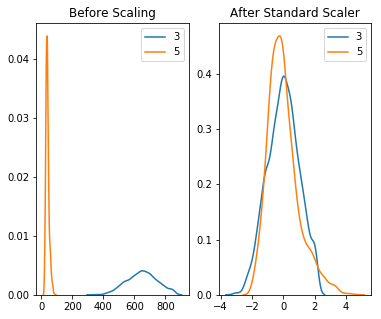

In [91]:
#of no use, just to check if scaling is working or not
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df1[3], ax=ax1)
sns.kdeplot(df1[5], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(df2[3], ax=ax2)
sns.kdeplot(df2[5], ax=ax2)
plt.show()

## Logistic Classifier Algorithm

In [92]:
#import LogisticRegression Algorithm
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

c:\users\671869\documents\traning_season2\training\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [93]:
#Predict value for X_test
y_pred_logistic=classifier.predict(X_test)

In [94]:
#check the cofficent
classifier.coef_

array([[-0.10859096,  0.22141114, -0.09572993, -0.05046438, -0.30239704,
         0.80480318, -0.04552888,  0.12534214, -0.02507102, -0.57687238,
         0.01580651]])

## Checking Accuracy

In [95]:
#check the accuracy and confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
conf_met=confusion_matrix(y_test,y_pred_logistic)
acc_logistic=accuracy_score(y_test,y_pred_logistic)
print(acc_logistic)
print(conf_met)

0.808
[[763  40]
 [152  45]]


## Save the model

In [96]:
#import pickle library
import pickle
import os

#create the file paths
#model_file_path=os.path.join(os.path.pardir,'models','model1.pkl')

#open the files to write
model_file_pickle=open('customer_predictor_model.pkl','wb')

#write in file
pickle.dump(classifier,model_file_pickle)

#close the file
model_file_pickle.close()

## Again load the model to check if it working or distorted

In [ ]:
#open files in read mode
model_file_pickle=open('customer_predictor_model.pkl','rb')

#load files
customer_predictor_model=pickle.load(model_file_pickle)

#close the file
model_file_pickle.close()



In [ ]:
#check the model
customer_predictor_model

## ========================THANK YOU!!!  ===============================

In [ ]:
import os
hello_world_script_file = os.path.join('api','hello_world_api.py')

In [ ]:
print(hello_world_script_file)

In [ ]:
%%writefile $hello_world_script_file

from flask import Flask, request

app = Flask(__name__)

@app.route('/api', methods=['GET', 'POST'])
def say_hello():
    data = request.get_json(force=True)
    name = data['name']
    return "hello {0}".format(name)

if __name__ == '__main__':
    app.run(port=5000, debug=True)

In [ ]:
import json
import requests

In [ ]:
url = 'http://127.0.0.1:5000/api'
data = json.dumps({'name' : 'abhi'})
r = requests.post(url,data)

In [ ]:
print(r)

In [2]:
import os
customer_predictor_flask_app = os.path.join('api','customer_predictor_flask_app.py')

In [6]:
%%writefile $customer_predictor_flask_app
#create flask_app file
import json
import os
from flask import Flask,jsonify,request,render_template
from flask_cors import CORS
import pickle
import numpy as np

app = Flask(__name__)
#CORS(app)

@app.route("/cuspredict/",methods=['GET','POST'])
def predict():
    creditscore = float(request.args.get('creditscore'))
    geography = request.args.get('geography')
    gender = request.args.get('gender')
    age = float(request.args.get('age'))
    tenure = float(request.args.get('tenure'))
    balance = float(request.args.get('balance'))
    hascrcard = float(request.args.get('hascrcard'))
    isactivemember = float(request.args.get('isactivemember'))
    estimatedsalary = float(request.args.get('estimatedsalary'))
    
    #return creditscore+" "+geography+" "+gender+" "+age+" "+tenure+" "+balance+" "+hascrcard+" "+isactivemember+" "+isactivemember
    

    
    if gender=='male':
        gender=1
    else:
        gender=0
        
    if geography=='Germany':
        geography_1=1
        geography_2=0
        geography_3=0
    elif geography=='Spain':
        geography_1=0
        geography_2=1
        geography_3=0
    else:
        geography_1=0
        geography_2=0
        geography_3=1
        
        
    with open('customer_predictor_model.pkl', 'rb') as handle:
        model = pickle.load(handle)
    
    status = model.predict(np.array([[creditscore, geography_1,geography_2,geography_3, gender,age,tenure,balance,hascrcard,isactivemember,estimatedsalary]]))
    
    return str(status[0])


@app.route("/",methods=['GET'])
def default():
    return render_template("index.html")#"<h1> Welcome to customer predictor model <h1>"
 

if __name__ == "__main__":
    app.run() 

Overwriting api\customer_predictor_flask_app.py


In [8]:
customer_predictor = os.path.join('api','predictor.py')

In [11]:
%%writefile $customer_predictor
import pickle
import pandas as pd
import numpy as np

class agent_predictor():
  def __init__(self):
    pass
  
  def deserialize(self):
    # de-serialize mlp_nn.pkl file into an object called model using pickle
    with open('customer_predictor_model.pkl', 'rb') as handle:
        model = pickle.load(handle)
        return model
  
  def predict(self, creditscore, geography_1,geography_2,geography_3, gender,age,tenure,balance,hascrcard,isactivemember,estimatedsalary):
    model = self.deserialize()
    return model.predict(np.array([[creditscore, geography_1,geography_2,geography_3, gender,age,tenure,balance,hascrcard,isactivemember,estimatedsalary]]))

Overwriting api\predictor.py


In [19]:
import pickle
import pandas as pd
import numpy as np


def deserialize():
    # de-serialize mlp_nn.pkl file into an object called model using pickle
    with open('customer_predictor_model.pkl', 'rb') as handle:
        model = pickle.load(handle)
        return model
  
def predict():
    model = deserialize()
    return model.predict(np.array([[834, 1,0,0, 1,64,4,1254,1,1,5478]]))

In [20]:
print(predict())

[1]


In [133]:
def customer_predict():
    creditscore = 646
    geography = "France"
    gender = "Female"
    age = 46
    tenure = 4
    balance = 0
    hascrcard = 1
    isactivemember = 0
    estimatedsalary = 93251.42
    
    if gender=='male':
        gender=1
    else:
        gender=0
        
    if geography=='Germany':
        geography_1=1
        geography_2=0
        geography_3=0
    elif geography=='Spain':
        geography_1=0
        geography_2=1
        geography_3=0
    else:
        geography_1=0
        geography_2=0
        geography_3=1

    
    with open('customer_predictor_model.pkl', 'rb') as handle:
        model = pickle.load(handle)
    
    status = model.predict(np.array([[creditscore, geography_1,geography_2,geography_3, gender,age,tenure,balance,hascrcard,isactivemember,estimatedsalary]]))
    print(status[0])

In [134]:
customer_predict()

1
